In [1]:
from pygbif import occurrences as occ

# Get all points for given species, filter for outliers, quantify areas around points to define range.  Then quantify
# overlap in ranges for species.  

# genusKey for Quercus: 2877951 - best practice to handle one species at a time?

# robur - 2878688
# macrocarpa - 2878213
# bicolor - 2878470

In [226]:
test = occ.search(speciesKey = 2878470)

In [227]:
test

{'offset': 0,
 'limit': 300,
 'endOfRecords': False,
 'count': 3431,
 'results': [{'key': 2543085000,
   'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
   'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
   'publishingCountry': 'US',
   'protocol': 'DWC_ARCHIVE',
   'lastCrawled': '2021-01-09T17:49:39.165+00:00',
   'lastParsed': '2021-01-09T19:52:05.209+00:00',
   'crawlId': 247,
   'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'extensions': {'http://rs.gbif.org/terms/1.0/Multimedia': [{'http://purl.org/dc/terms/rightsHolder': 'Jeff Skrentny',
      'http://purl.org/dc/terms/identifier': 'https://static.inaturalist.org/photos/58872028/original.jpg?1577905532',
      'http://purl.org/dc/terms/type': 'StillImage',
      'http://rs.tdwg.org/dwc/terms/catalogNumber': '58872028',
      'http://purl.org/dc/terms/publisher': 'iNaturalist',
      'http://purl.org/dc/terms/license': 'http://c

In [2]:
from pygbif import maps

# Consider which bases of records to count, best time ranges.

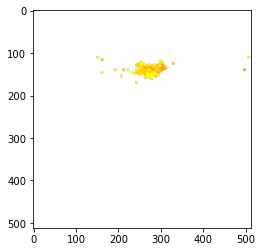

In [228]:
out = maps.map(taxonKey = 2878470, bin = "hex",
       hexPerTile = 100, style = "classic-noborder.poly")
out.response
out.path
out.img
out.plot()

In [230]:
x = maps.map(taxonKey = 2878213,
      format = ".mvt")
x.response
x.path
x.img # None
import mapbox_vector_tile
d = mapbox_vector_tile.decode(x.response.content)

# I can extract coordinates from this dict, then use Shapely to construct a polygon.  Ideally I would want only the coordinates
# at the edges of the shape, how could I sort for that? Maybe use Multi polygons?

In [231]:
x = maps.map(taxonKey = 2878470,
      format = ".mvt")
x.response
x.path
x.img # None
import mapbox_vector_tile
e = mapbox_vector_tile.decode(x.response.content)

In [189]:
d

{'occurrence': {'extent': 512,
  'version': 1,
  'features': [{'geometry': {'type': 'Point', 'coordinates': [295, 378]},
    'properties': {'total': 1, '2017': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [295, 377]},
    'properties': {'2018': 1, 'total': 2, '2020': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [228, 348]},
    'properties': {'2019': 3, 'total': 4, '2020': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [229, 378]},
    'properties': {'total': 2, '1970': 1, '1966': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [228, 344]},
    'properties': {'total': 1, '1917': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [230, 400]},
    'properties': {'total': 1, '1937': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [230, 398]},
    'properties': {'1953': 2, 'total': 2},

In [232]:
e

{'occurrence': {'extent': 512,
  'version': 1,
  'features': [{'geometry': {'type': 'Point', 'coordinates': [262, 379]},
    'properties': {'1888': 1, 'total': 2, '2015': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [295, 378]},
    'properties': {'2019': 3, '2018': 1, 'total': 5, '2020': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [262, 378]},
    'properties': {'1887': 1, 'total': 3, '1940': 1, '1988': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [295, 377]},
    'properties': {'2018': 1, 'total': 3, '2016': 2},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [262, 377]},
    'properties': {'total': 1, '2020': 1},
    'id': 0,
    'type': 1},
   {'geometry': {'type': 'Point', 'coordinates': [262, 376]},
    'properties': {'2019': 7,
     '1985': 1,
     '2018': 4,
     'total': 21,
     '2017': 1,
     '2016': 1,
     '2015': 2,
     '1891': 1,

In [209]:
# Get list of coordinates from a .mvt file.
for key1 in d.keys():
    for key2 in d[key1].keys():
        if key2 == "features":
            x = d[key1]["features"]
            clist = []
            for i in x:
                j = (i["geometry"])
                k = tuple(j["coordinates"])
                clist.append(k)
print(clist)

[(295, 378), (295, 377), (228, 348), (229, 378), (228, 344), (230, 400), (230, 398), (230, 397), (163, 365), (230, 393), (229, 362), (229, 359), (296, 388), (296, 387), (296, 386), (296, 385), (296, 384), (296, 383), (296, 382), (296, 378), (230, 380), (230, 374), (229, 342), (231, 404), (231, 403), (231, 402), (231, 400), (230, 369), (230, 368), (231, 398), (164, 366), (296, 360), (230, 362), (231, 392), (230, 360), (297, 386), (297, 385), (297, 384), (297, 383), (231, 379), (231, 378), (230, 346), (231, 374), (297, 372), (297, 371), (230, 342), (297, 370), (230, 341), (231, 369), (232, 399), (231, 368), (232, 398), (231, 367), (232, 397), (232, 396), (231, 362), (165, 362), (165, 361), (231, 359), (231, 357), (298, 386), (298, 385), (298, 384), (298, 383), (232, 379), (232, 378), (298, 372), (231, 342), (298, 370), (231, 341), (231, 340), (233, 402), (232, 370), (233, 401), (232, 369), (232, 368), (233, 399), (232, 367), (232, 366), (233, 396), (233, 395), (166, 366), (232, 363), (23

In [222]:
def mvt_coords(file):
    '''
    Extract coordinates from a .mvt file generated by pygbif.  Returns a list of coordinates.
    '''
    for key1 in file.keys():
        for key2 in file[key1].keys():
            if key2 == "features":
                x = file[key1]["features"]
                clist = []
                for i in x:
                    j = (i["geometry"])
                    k = tuple(j["coordinates"])
                    clist.append(k)
    return clist

In [236]:
elist = mvt_coords(e)

In [237]:
elist

[(262, 379),
 (295, 378),
 (262, 378),
 (295, 377),
 (262, 377),
 (262, 376),
 (262, 375),
 (262, 374),
 (262, 373),
 (262, 370),
 (295, 369),
 (295, 365),
 (262, 365),
 (295, 362),
 (329, 384),
 (296, 383),
 (296, 382),
 (296, 378),
 (296, 376),
 (263, 376),
 (263, 375),
 (263, 374),
 (296, 370),
 (296, 369),
 (263, 370),
 (263, 368),
 (296, 365),
 (297, 392),
 (164, 364),
 (297, 373),
 (264, 374),
 (297, 372),
 (297, 371),
 (563, 425),
 (297, 369),
 (264, 368),
 (297, 366),
 (264, 359),
 (298, 383),
 (298, 373),
 (298, 372),
 (298, 371),
 (298, 370),
 (298, 369),
 (265, 368),
 (265, 359),
 (265, 353),
 (497, 370),
 (266, 375),
 (299, 373),
 (299, 372),
 (299, 371),
 (299, 367),
 (266, 367),
 (266, 366),
 (233, 364),
 (266, 359),
 (300, 386),
 (266, 355),
 (300, 384),
 (267, 381),
 (267, 378),
 (267, 377),
 (300, 374),
 (300, 373),
 (300, 372),
 (300, 371),
 (300, 369),
 (267, 370),
 (267, 368),
 (267, 363),
 (267, 355),
 (301, 385),
 (268, 379),
 (268, 378),
 (301, 377),
 (268, 377),

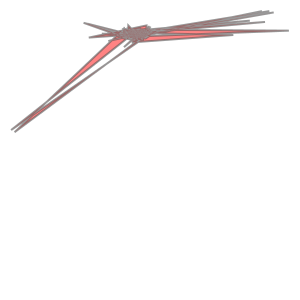

In [238]:
from shapely.geometry import Polygon
polygon = Polygon(elist)
polygon

In [ ]:
# Check JSON package for parsing .mvt files.